Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Aula 3 - Data Wrangling

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---



Nesta prática faremos a análise dos dados da Covid19 no Brasil até o momento. Algumas células estão preenchidas para auxiliar na leitura dos dados. Faça o que se pede.

In [1]:
# descompactar arquivos .rar
!pip install patool

In [2]:
# Bibliotecas utilizadas
import patoolib
import pandas as pd

Extraia os dados baixados de https://covid.saude.gov.br/

In [3]:
# Código para extrair o arquivo rar
patoolib.extract_archive('HIST_PAINEL_COVIDBR_17ago2022.rar')

patool: Extracting HIST_PAINEL_COVIDBR_17ago2022.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "C:\Users\lucas\Desktop\PUC\4 semestre\Mineração de Dados\Exercícios EAD\HIST_PAINEL_COVIDBR_17ago2022.rar"
patool:     with cwd=.\Unpack_og29gov1
patool: ... HIST_PAINEL_COVIDBR_17ago2022.rar extracted to `HIST_PAINEL_COVIDBR_17ago20221' (multiple files in root).


'HIST_PAINEL_COVIDBR_17ago20221'

Criar uma lista de `Dataframes`. Estamos aqui fazendo um casting para tornar a coluna de datas em um formato específico de datas do Python ao invés de texto. Também se colocou a coluna de data como o índice.

In [4]:
lista_df = []

anos = (2020, 2021, 2022)

for ano in anos:
    for parte in (1,2):
        arq = 'HIST_PAINEL_COVIDBR_17ago2022/' + f'HIST_PAINEL_COVIDBR_{ano}_Parte{parte}_17ago2022.csv ...'
        print(f'lendo o arquivo {arq}')
        lista_df.append( pd.read_csv(arq, sep=';', parse_dates=['data'], index_col=['data']) )


lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2020_Parte1_17ago2022.csv ...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2020_Parte2_17ago2022.csv ...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2021_Parte1_17ago2022.csv ...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2021_Parte2_17ago2022.csv ...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2022_Parte1_17ago2022.csv ...
lendo o arquivo HIST_PAINEL_COVIDBR_17ago2022/HIST_PAINEL_COVIDBR_2022_Parte2_17ago2022.csv ...


Faça aqui o concatenamento das linhas dos `dataframes` da lista em um `dataframe` único. 

In [5]:
df = pd.concat(lista_df)
df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-02-25,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
2020-02-26,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2020-02-27,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
2020-02-28,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
2020-02-29,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


Nosso objetivo é mostrar somente os valores a nível de Brasil. Faça um filtro das linhas baseado na coluna `regiao` somente para a correspondência `Brasil`. Salve este filtro em um `Dataframe`.

In [6]:
# Solução
df_brasil = df[df['regiao'] == 'Brasil']
df_brasil.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
data,,,,,,,,,,,,,,,,
2020-02-25,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
2020-02-26,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2020-02-27,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
2020-02-28,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
2020-02-29,Brasil,NaN,NaN,76,NaN,NaN,NaN,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


Selecione somente as colunas 'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos' do `Dataframe` e descarte as demais.

In [7]:
# Solução
df_brasil = df_brasil[['casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos']]
df_brasil.columns

Index(['casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos'], dtype='object')

Faça aqui o gráfico de 'casosAcumulado' ao longo dos dias desde o começo da pandemia.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()

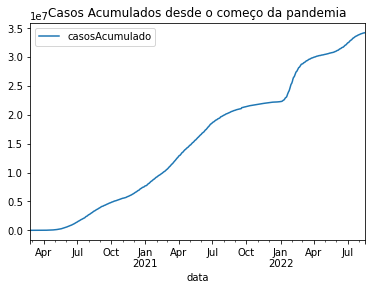

In [9]:
df_brasil.plot(
    y='casosAcumulado',
    title='Casos Acumulados desde o começo da pandemia'
);

Faça aqui o gráfico de 'obitosAcumulado' ao longo dos dias desde o começo da pandemia.

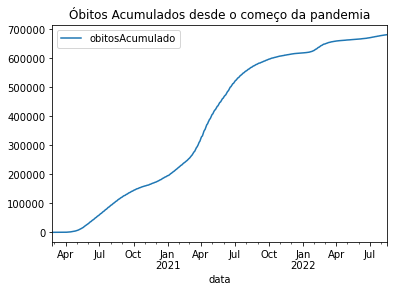

In [10]:
df_brasil.plot(
    y='obitosAcumulado',
    title='Óbitos Acumulados desde o começo da pandemia'
);

Qual a quantidade total de óbitos por Covid19 no Brasil a partir da análise desses dados?

**Resposta:**

    A partir da análise gráfica é possível inferir que a quantidade total de óbitos por Covid19 no Brasil é próxima de 700,000 (Setecentos mil óbitos). Tal constatação pode ser verificado manipulando o DataFrame como nos exemplos abaixo, chegando a um total de óbitos de 682,010 (Setecentos e oitenta e dois mil e dez óbitos).

In [11]:
# Solução
df_brasil['obitosNovos'].sum()

682010

In [12]:
# Solução alternativa
df_brasil['obitosAcumulado'].iloc[-1]

682010

Crie uma coluna com a media móvel dos 'casosNovos' e 'obitosNovos'. Use uma janela de 7 dias para o cálculo da média móvel.

Use o seguinte exemplo como referência para calcular a média móvel.

```python

df['nomeColuna'].rolling(Janela).mean()
```

In [13]:
# Solução
df_brasil['mva_casosNovos'] = df_brasil['casosNovos'].rolling(window=7, min_periods=1).mean()

In [14]:
# Solução
df_brasil['mva_obitosNovos'] = df_brasil['obitosNovos'].rolling(window=7, min_periods=1).mean()

Faça um gráfico da evolução dos casos e sua média móvel. Use a coluna 'casosNovos' para a evolução diária de casos e a coluna referente à média móvel de casos que você calculou.

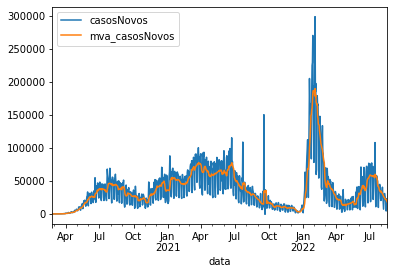

In [15]:
# Solução
df_brasil.plot(y=['casosNovos', 'mva_casosNovos']);

Faça um gráfico da evolução dos óbitos e sua média móvel. Use a coluna 'obitosNovos' para a evolução diária de óbitos e a coluna referente à média móvel de óbitos que você calculou.

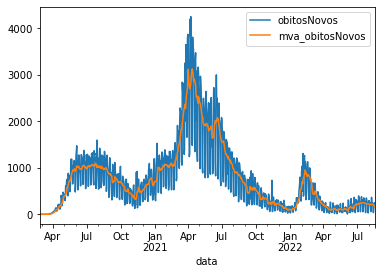

In [16]:
# Solução
df_brasil.plot(y=['obitosNovos', 'mva_obitosNovos']);

Qual o dia com o maior registro de óbitos e qual é esse valor?

In [17]:
df_brasil.obitosNovos.idxmax()

Timestamp('2021-04-08 00:00:00')

In [18]:
df_brasil.obitosNovos.max()

4249

**Resposta:**

    O dia 08/04/2021 foi o que teve o maior registro de óbitos de covid no Brasil, registrando um total de 4,249 óbitos.

Qual o dia com a maior média móvel de óbitos e qual é esse valor?

In [19]:
df_brasil.mva_obitosNovos.idxmax()

Timestamp('2021-04-12 00:00:00')

In [20]:
df_brasil.mva_obitosNovos.max()

3123.5714285714284

**Resposta:**

    O dia 12/04/2021 foi o que teve o maior registro de óbitos de covid no Brasil, registrando uma média móvel de 3,123 óbitos.

## Covid no Rio x São Paulo

In [98]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [99]:
# Filtra municípios
df_munic = df[df.municipio.isin(['Rio de Janeiro', 'São Paulo'])]

In [105]:
# Média móvel óbitos novos
df_munic['mva_obitosNovos'] = df_munic['obitosNovos'].rolling(window=30, min_periods=1).mean()

In [107]:
df_munic.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'semanaEpi', 'populacaoTCU2019', 'casosAcumulado',
       'casosNovos', 'obitosAcumulado', 'obitosNovos', 'Recuperadosnovos',
       'emAcompanhamentoNovos', 'interior/metropolitana', 'mva_obitosNovos',
       'mva_casosNovos'],
      dtype='object')

In [101]:
# Média móvel casos novos
df_munic['mva_casosNovos'] = df_munic['casosNovos'].rolling(window=14, min_periods=1).mean()

In [103]:
fig4 = px.line(df_munic.reset_index(),
               x='data',
               y='mva_obitosNovos',
               color='municipio',
               title='<b>Média Móvel (30d) Óbitos Novos</b>')
fig4.show()

In [104]:
fig3 = px.line(df_munic.reset_index(),
               x='data',
               y='mva_casosNovos',
               color='municipio',
               title='<b>Média Móvel (14d) Casos Novos</b>'
              )
fig3.show()

In [108]:
import numpy as np

In [112]:
np.array([1,2,3,4,6]).reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4],
       [6]])

$$y = wx + b$$